## Dependencias

In [1]:
import pandas as pd
import numpy as np

from datetime import datetime

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import PassiveAggressiveClassifier

import seaborn as sns

## Lectura de datos

In [2]:
ruta = '/home/oscarjarillo/Documentos/Análisis Multivariado/Perceptron/fraud_oracle.csv'

In [3]:
df = pd.read_csv(ruta)
df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [4]:
df.shape

(15420, 33)

## Análisis exploratorio

### Valores nulos

In [5]:
df.isnull().sum()

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
FraudFound_P            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
dtype: int64

<AxesSubplot:>

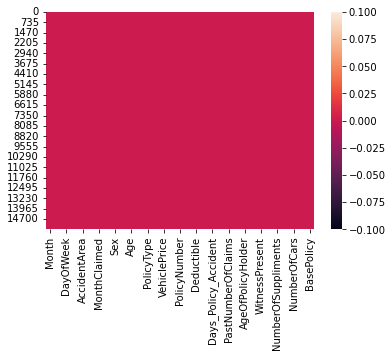

In [6]:
sns.heatmap(df.isnull(), cbar= True)

### Tipo de datos

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

### Balanceo de muestra

In [8]:
df['FraudFound_P'].value_counts()

0    14497
1      923
Name: FraudFound_P, dtype: int64

In [9]:
df = pd.concat([d.sample(923).reset_index(drop = True).assign(FraudFound_P = t) 
                for t,d in df.groupby('FraudFound_P')], ignore_index = True)

## Selección de variables

In [10]:
vt = ['FraudFound_P']
var_num = [x for x in df.columns if df[x].dtype != 'object' and x != vt[0]]

## Partición

In [11]:
Xt, Xv, yt, yv = train_test_split(df[var_num], df[vt[0]], train_size= 0.7)
Xt.reset_index(drop = True, inplace = True)
Xv.reset_index(drop = True, inplace = True)
yt.reset_index(drop = True, inplace = True)
yv.reset_index(drop = True, inplace = True)

## Aprendizaje

### Hiperparámetros

In [13]:
hp = dict(max_iter = range(100,200),
         fit_intercept = [True, False],
         C = np.arange(0.1,3,0.1))

In [14]:
modelo = PassiveAggressiveClassifier()

### Hiperparametrización

In [15]:
grid = GridSearchCV(param_grid= hp,
                   cv = 3,
                   scoring= 'accuracy',
                   n_jobs= -1,
                   verbose= True,
                   estimator = modelo)

## Entrenamiento

In [16]:
grid.fit(Xt, yt)

Fitting 3 folds for each of 5800 candidates, totalling 17400 fits


GridSearchCV(cv=3, estimator=PassiveAggressiveClassifier(), n_jobs=-1,
             param_grid={'C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9]),
                         'fit_intercept': [True, False],
                         'max_iter': range(100, 200)},
             scoring='accuracy', verbose=True)

### Mejores parámetros

In [17]:
grid.best_params_

{'C': 2.2, 'fit_intercept': True, 'max_iter': 139}

In [18]:
modelo = grid.best_estimator_
modelo

PassiveAggressiveClassifier(C=2.2, max_iter=139)

## validación del modelo

### Probabilidad

In [19]:
print(accuracy_score(y_pred= modelo.predict(Xt), y_true = yt))
print(accuracy_score(y_pred= modelo.predict(Xv), y_true = yv))

0.48839009287925694
0.5270758122743683


### Matriz de confusión

In [20]:
print(confusion_matrix(y_pred= modelo.predict(Xt), y_true = yt))
print(confusion_matrix(y_pred= modelo.predict(Xv), y_true = yv))

[[631   0]
 [661   0]]
[[292   0]
 [262   0]]


## Predicciones

In [21]:
df['Pred'] = modelo.predict(df[var_num])
df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy,Pred
0,Dec,4,Monday,Pontiac,Urban,Friday,Jan,2,Male,Married,...,41 to 50,No,No,External,3 to 5,no change,1 vehicle,1996,Collision,0
1,Sep,3,Thursday,Pontiac,Urban,Friday,Sep,4,Male,Married,...,31 to 35,No,No,External,1 to 2,no change,1 vehicle,1995,All Perils,0
2,Mar,3,Tuesday,Pontiac,Urban,Tuesday,Mar,5,Male,Married,...,51 to 65,No,No,External,1 to 2,no change,1 vehicle,1995,Liability,0
3,Dec,4,Friday,Toyota,Urban,Wednesday,Dec,4,Male,Married,...,41 to 50,No,No,External,1 to 2,no change,1 vehicle,1996,Collision,0
4,Jun,3,Tuesday,Honda,Urban,Friday,Jun,4,Male,Married,...,36 to 40,No,No,External,none,4 to 8 years,2 vehicles,1996,Liability,0
